#0. Mount Drive

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/Colab Notebooks/PROJECT'

Mounted at /content/gdrive
[Errno 2] No such file or directory: '/content/gdrive/MyDrive/Colab Notebooks/PROJECT'
/content


#1. Import libraries

In [ ]:
!pip install scikeras

In [2]:

from sklearn.svm import SVC
import pandas as pd

import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from keras.layers import Dense
from scikeras.wrappers import KerasClassifier, KerasRegressor
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'scikeras'

#2. Load dataset





In [ ]:
# code
data = pd.read_csv("diabetes2.csv")
data

FileNotFoundError: [Errno 2] No such file or directory: 'diabetes2.csv'

#3. Mô tả dữ liệu, các thuộc tính, kiểu thuộc tính

In [3]:
# code
data.info()
data.describe()


NameError: name 'data' is not defined

#4. Phân phối tệp dữ liệu

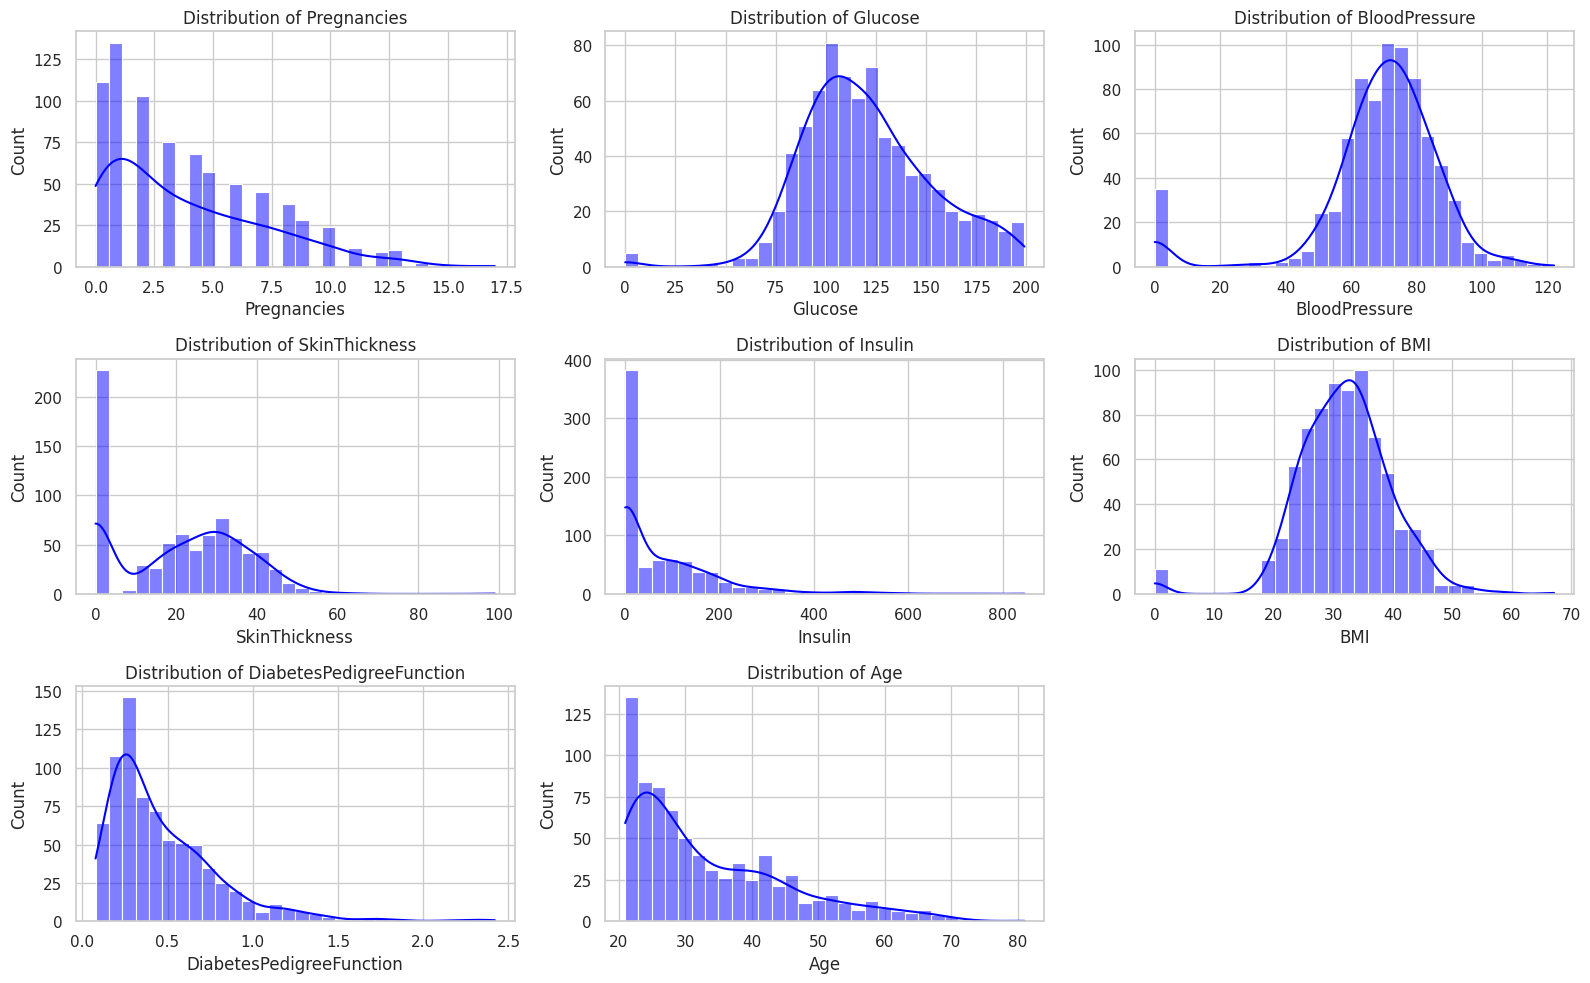

<ipython-input-14-23ee5b166c04>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data=data, palette='viridis')


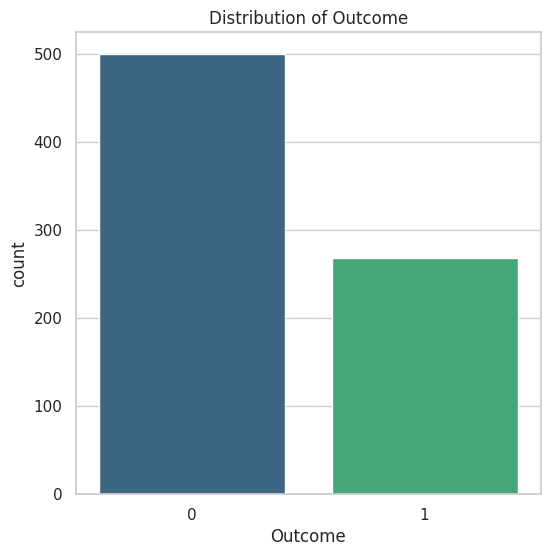

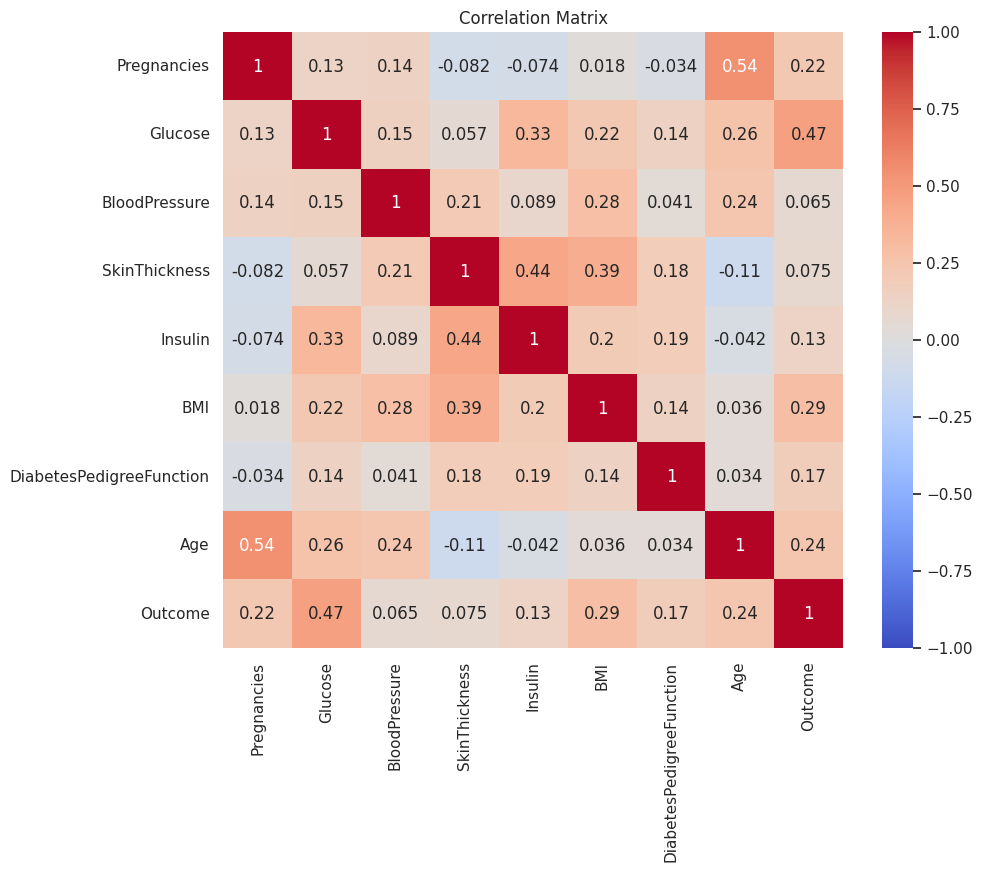

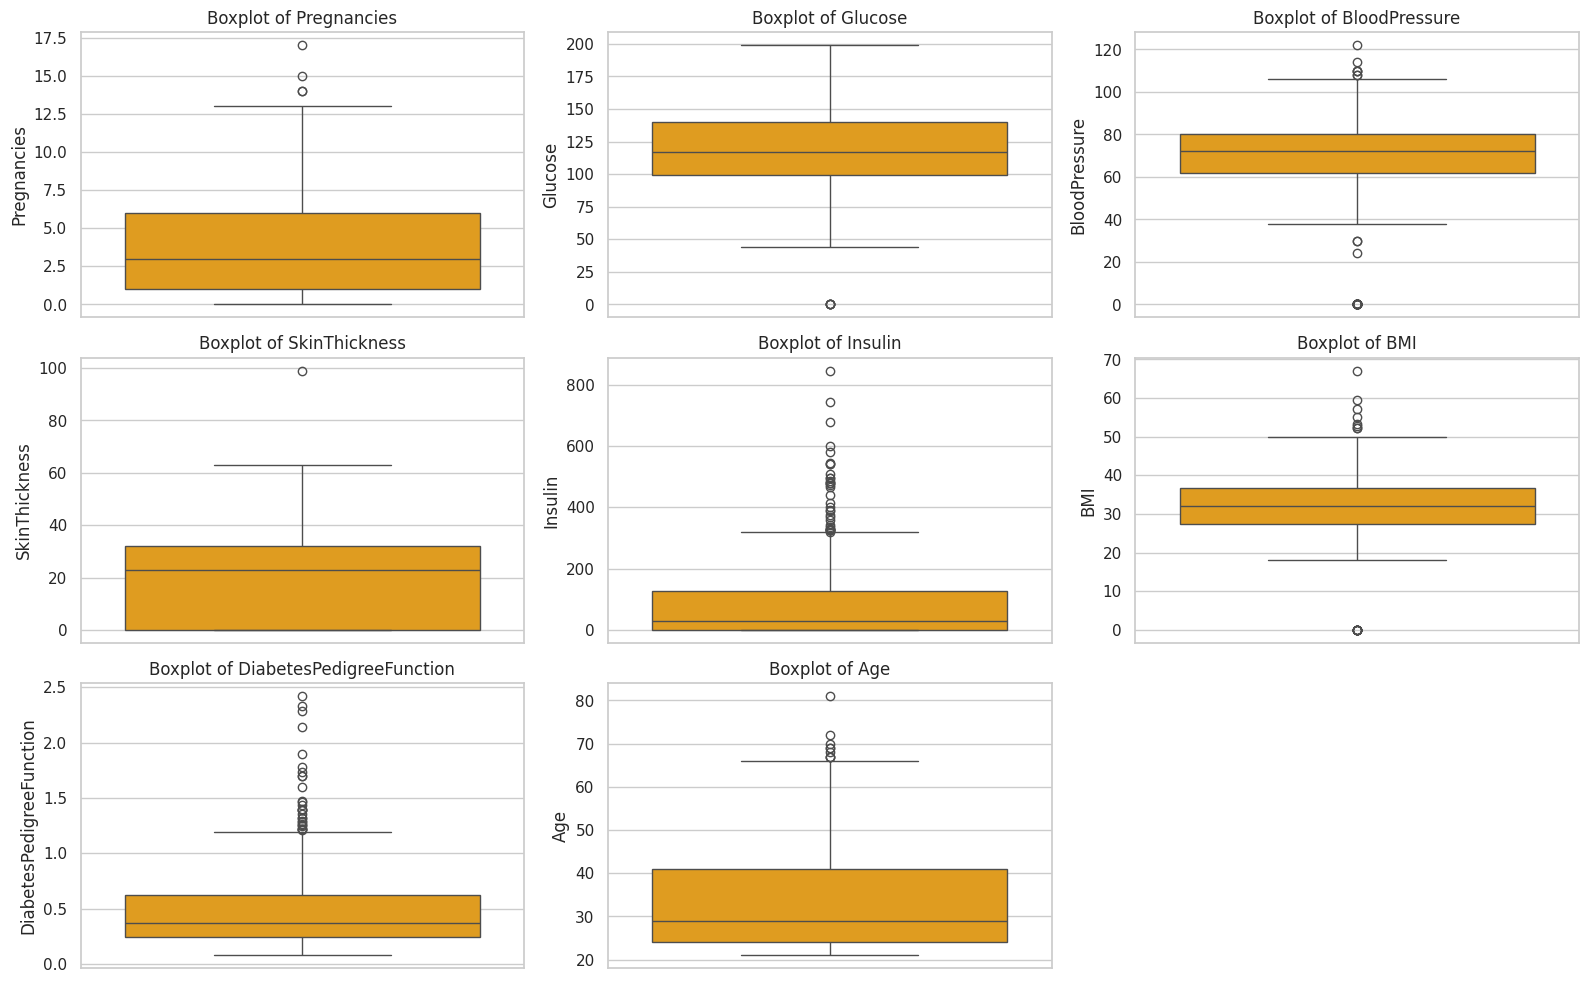

In [ ]:


# Đọc dữ liệu
data = pd.read_csv("diabetes2.csv")

# Đổi tên cột cho dễ hiểu
data.columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

# Thiết lập kiểu hiển thị đồ thị
sns.set(style="whitegrid")

# Phân phối của các đặc trưng
plt.figure(figsize=(16, 10))

for i, column in enumerate(data.columns[:-1]):
    plt.subplot(3, 3, i + 1)
    sns.histplot(data[column], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

# Phân phối của Outcome
plt.figure(figsize=(6, 6))
sns.countplot(x='Outcome', data=data, palette='viridis')
plt.title('Distribution of Outcome')
plt.show()

# Ma trận tương quan giữa các đặc trưng
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

# Boxplot để kiểm tra outliers
plt.figure(figsize=(16, 10))

for i, column in enumerate(data.columns[:-1]):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=data[column], color='orange')
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()


#5. Xử lí tiền dữ liệu

In [4]:
#code

# Đọc dữ liệu
data = pd.read_csv('diabetes2.csv')
data.columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

# Xử lý các giá trị bằng 0 hoặc thiếu
for column in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
    data[column].replace(0, np.nan, inplace=True)
    data[column].fillna(data[column].median(), inplace=True)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data.drop('Outcome', axis=1)), columns=data.columns[:-1])

# Thêm cột Outcome trở lại sau khi chuẩn hóa
data_scaled['Outcome'] = data['Outcome']

# Phân chia dữ liệu thành tập huấn luyện và tập kiểm tra
X = data_scaled.drop('Outcome', axis=1)
y = data_scaled['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Kiểm tra kết quả tiền xử lý
print(X_train.head())
print(X_test.head())
print(y_train.head())
print(y_test.head())



FileNotFoundError: [Errno 2] No such file or directory: 'diabetes2.csv'

#6. Neural Network

In [5]:


# Đọc dữ liệu
data = pd.read_csv('diabetes2.csv')
data.columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

# Xử lý các giá trị bằng 0 hoặc thiếu
for column in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
    data[column].replace(0, np.nan, inplace=True)
    data[column].fillna(data[column].median(), inplace=True)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data.drop('Outcome', axis=1))
y = data['Outcome']

# Phân chia dữ liệu thành tập huấn luyện và tập tạm thời (temporary)
X_temp, X_test, y_temp, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Phân chia tập tạm thời thành tập huấn luyện và tập xác nhận
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)  # 0.25 * 0.8 = 0.2

# Hàm tạo mô hình
def create_model(optimizer='adam', activation='relu'):
    model = Sequential()
    model.add(Dense(12, input_dim=8, kernel_initializer='glorot_uniform', activation='relu'))
    model.add(Dense(8, kernel_initializer='glorot_uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='glorot_uniform', activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Khởi tạo mô hình KerasClassifier
model = KerasClassifier(build_fn=create_model, verbose=0)

# Các tham số cần tìm
param_grid = {
    'batch_size': [10, 20, 40],
    'epochs': [50, 100, 150],
    'optimizer': ['adam', 'sgd'],
}

# GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)

# Lấy mô hình tốt nhất
best_model = grid_result.best_estimator_

# Đánh giá trên tập xác nhận
y_val_pred = best_model.predict(X_val)
accuracy_val = accuracy_score(y_val, y_val_pred)
precision_val = precision_score(y_val, y_val_pred)
recall_val = recall_score(y_val, y_val_pred)
f1_val = f1_score(y_val, y_val_pred)

print(f'Validation Set Scores:')
print(f'Accuracy: {accuracy_val}')
print(f'Precision: {precision_val}')
print(f'Recall: {recall_val}')
print(f'F1 Score: {f1_val}')

# Đánh giá trên tập kiểm tra
y_test_pred = best_model.predict(X_test)
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

print(f'Test Set Scores:')
print(f'Accuracy: {accuracy_test}')
print(f'Precision: {precision_test}')
print(f'Recall: {recall_test}')
print(f'F1 Score: {f1_test}')


FileNotFoundError: [Errno 2] No such file or directory: 'diabetes2.csv'

#7. SVM

In [ ]:

# Đọc dữ liệu
data = pd.read_csv('diabetes2.csv')

data.columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

# Xử lý các giá trị bằng 0 hoặc thiếu
for column in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
    data[column].replace(0, np.nan, inplace=True)
    data[column].fillna(data[column].median(), inplace=True)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data.drop('Outcome', axis=1))
y = data['Outcome']

# Phân chia dữ liệu thành tập huấn luyện và tập tạm thời (temporary)
X_temp, X_test, y_temp, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Phân chia tập tạm thời thành tập huấn luyện và tập xác nhận
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)  # 0.25 * 0.8 = 0.2

# Khởi tạo mô hình SVM
model = SVC()

# Các tham số cần tìm
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4]
}

# GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)

# Lấy mô hình tốt nhất
best_model = grid_result.best_estimator_

# Đánh giá trên tập xác nhận
y_val_pred = best_model.predict(X_val)
accuracy_val = accuracy_score(y_val, y_val_pred)
precision_val = precision_score(y_val, y_val_pred)
recall_val = recall_score(y_val, y_val_pred)
f1_val = f1_score(y_val, y_val_pred)

print(f'Validation Set Scores:')
print(f'Accuracy: {accuracy_val}')
print(f'Precision: {precision_val}')
print(f'Recall: {recall_val}')
print(f'F1 Score: {f1_val}')

# Đánh giá trên tập kiểm tra
y_test_pred = best_model.predict(X_test)
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

print(f'Test Set Scores:')
print(f'Accuracy: {accuracy_test}')
print(f'Precision: {precision_test}')
print(f'Recall: {recall_test}')
print(f'F1 Score: {f1_test}')


Validation Set Scores:
Accuracy: 0.7402597402597403
Precision: 0.7407407407407407
Recall: 0.37735849056603776
F1 Score: 0.5
Test Set Scores:
Accuracy: 0.7142857142857143
Precision: 0.627906976744186
Recall: 0.4909090909090909
F1 Score: 0.5510204081632653


#8. Logistic Regression

In [ ]:


# Đọc dữ liệu
data = pd.read_csv('diabetes2.csv')

data.columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

# Xử lý các giá trị bằng 0 hoặc thiếu
for column in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
    data[column].replace(0, np.nan, inplace=True)
    data[column].fillna(data[column].median(), inplace=True)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data.drop('Outcome', axis=1))
y = data['Outcome']

# Phân chia dữ liệu thành tập huấn luyện và tập tạm thời (temporary)
X_temp, X_test, y_temp, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Phân chia tập tạm thời thành tập huấn luyện và tập xác nhận
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)  # 0.25 * 0.8 = 0.2

# Khởi tạo mô hình Logistic Regression
model = LogisticRegression()

# Các tham số cần tìm
param_grid = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['lbfgs', 'liblinear', 'saga', 'sag'],
    'max_iter': [100, 200, 300]
}

# GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)

# Lấy mô hình tốt nhất
best_model = grid_result.best_estimator_

# Đánh giá trên tập xác nhận
y_val_pred = best_model.predict(X_val)
accuracy_val = accuracy_score(y_val, y_val_pred)
precision_val = precision_score(y_val, y_val_pred)
recall_val = recall_score(y_val, y_val_pred)
f1_val = f1_score(y_val, y_val_pred)

print(f'Validation Set Scores:')
print(f'Accuracy: {accuracy_val}')
print(f'Precision: {precision_val}')
print(f'Recall: {recall_val}')
print(f'F1 Score: {f1_val}')

# Đánh giá trên tập kiểm tra
y_test_pred = best_model.predict(X_test)
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

print(f'Test Set Scores:')
print(f'Accuracy: {accuracy_test}')
print(f'Precision: {precision_test}')
print(f'Recall: {recall_test}')
print(f'F1 Score: {f1_test}')


Validation Set Scores:
Accuracy: 0.7662337662337663
Precision: 0.7428571428571429
Recall: 0.49056603773584906
F1 Score: 0.5909090909090909
Test Set Scores:
Accuracy: 0.7337662337662337
Precision: 0.6296296296296297
Recall: 0.6181818181818182
F1 Score: 0.6238532110091743


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
360 fits failed out of a total of 576.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
36 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1194, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/

CẢM ƠN THẦY VÀ MỌI NGƯỜI ĐÃ XEM BÀI LÀM CỦA NHÓM EM!!!